# Udemy development courses analysis

In this notebook I'll take a look at a large amount of Udemy courses in the category "Development".  
There are courses from Finance, Accounting, Book Keeping, Compliance, Cryptocurrence, Blockchain, Economics, Investing & Trading, Taxes and much more each having multiple courses under its domain.  

I am interested in developing a Machine Learning model that tries to predict the rating for a course.

# 1. Data

Original data comes from [Kaggle](https://www.kaggle.com/jilkothari/finance-accounting-courses-udemy-13k-course).  

There are 17 features described in the dataset:

* `id`: The course ID of that particular course.
* `title`: Shows the unique names of the courses available under the development category on Udemy.
* `url`: Gives the URL of the course.
* `is_paid`: Returns a boolean value displaying true if the course is paid and false if otherwise.
* `num_subscribers`: Shows the number of people who have subscribed that course.
* `avg_rating_recent`: Reflects the recent changes in the average rating.
* `num_reviews`: Gives us an idea related to the number of ratings that a course has received.
* `num_published_lectures`: Shows the number of lectures the course offers.
* `num_published_practice_tests`: Gives an idea of the number of practice tests that a course offers.
* `created`: The time of creation of the course.
* `published_time`: Time of publishing the course.
* `discounted_price_amount`: The discounted price which a certain course is being offered at.
* `discounted_price_currency`: The currency corresponding to the discounted price which a certain course is being offered at.
* `price_detail_amount`: The original price of a particular course.
* `price_detail_currency`: The currency corresponding to the price detail amount for a course.

I will use `avg_rating` as the target feature.

# 2. Evaluation

Since I am trying to predict a numeric value, **this will be a regression problem**.  
For this reason, I will evaluate my model using the standard measures for a regression problem, most importantly `mean squared error (MSE)`.

# 3. Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('ggplot')

seed = 893145

We know that there are two datetime columns, being `created` and `published_time`.  
Let's see if pandas is able to parse them automatically.

In [2]:
df = pd.read_csv('./data/udemy-development-courses.csv', parse_dates=['created', 'published_time'])
df_copy = df.copy()
df.head()

id                                              title  \
0   762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1   937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2  1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3   648826         The Complete Financial Analyst Course 2020   
4   637930  An Entire MBA in 1 Course:Award Winning Busine...   

                                                 url  is_paid  \
0                 /course/the-complete-sql-bootcamp/     True   
1                                 /course/tableau10/     True   
2                        /course/pmp-pmbok6-35-pdus/     True   
3     /course/the-complete-financial-analyst-course/     True   
4  /course/an-entire-mba-in-1-courseaward-winning...     True   

   num_subscribers  avg_rating  avg_rating_recent   rating  num_reviews  \
0           295509     4.66019            4.67874  4.67874        78006   
1           209070     4.58956            4.60015  4.60015        54581   
2           155282     4.59491            4.59326  4.59326        52653   
3           245860     4.54407            4.53772  4.53772        46447   
4           374836     4.47080            4.47173  4.47173        41630   

   is_wishlisted  num_published_lectures  num_published_practice_tests  \
0          False                      84                             0   
1          False                      78                             0   
2          False                     292                             2   
3          False                     338                             0   
4          False                      83                             0   

                    created            published_time  discount_price_amount  \
0 2016-02-14 22:57:48+00:00 2016-04-06 05:16:11+00:00                  455.0   
1 2016-08-22 12:10:18+00:00 2016-08-23 16:59:49+00:00                  455.0   
2 2017-09-26 16:32:48+00:00 2017-11-14 23:58:14+00:00                  455.0   
3 2015-10-23 13:34:35+00:00 2016-01-21 01:38:48+00:00                  455.0   
4 2015-10-12 06:39:46+00:00 2016-01-11 21:39:33+00:00                  455.0   

  discount_price_currency discount_price_price_string  price_detail_amount  \
0                     INR                        ₹455               8640.0   
1                     INR                        ₹455               8640.0   
2                     INR                        ₹455               8640.0   
3                     INR                        ₹455               8640.0   
4                     INR                        ₹455               8640.0   

  price_detail_currency price_detail_price_string  
0                   INR                    ₹8,640  
1                   INR                    ₹8,640  
2                   INR                    ₹8,640  
3                   INR                    ₹8,640  
4                   INR                    ₹8,640

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   url                           13608 non-null  object             
 3   is_paid                       13608 non-null  bool               
 4   num_subscribers               13608 non-null  int64              
 5   avg_rating                    13608 non-null  float64            
 6   avg_rating_recent             13608 non-null  float64            
 7   rating                        13608 non-null  float64            
 8   num_reviews                   13608 non-null  int64              
 9   is_wishlisted                 13608 non-null  bool               
 10  num_published_lectures        1360

Pandas did the trick!  

Now, there seems to be a duplicate: `rating` and `avg_rating_recent`.  
Let's see if they are really equal.

In [4]:
(df.avg_rating_recent == df.rating).value_counts()

True    13608
dtype: int64

Yes, they are.  
Not a big deal, I'll just drop `rating`.

In [5]:
df.drop('rating', inplace=True, axis=1)

Now let's check for missing values.

In [6]:
df.isna().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price_amount           1403
discount_price_currency         1403
discount_price_price_string     1403
price_detail_amount              497
price_detail_currency            497
price_detail_price_string        497
dtype: int64

## Filling missing values

Sklearn offers a simple pipelining imputing. I will use just that.  

First, however, we have to understand **which** value to impute each column with.  
Let's focus on `discount_price_price_string` and `price_detail_price_string`. I suspect that their values are just the string version of, respectively, `discount_price_amount` and `price_detail_amount`.  
If this guess was true, then these columns are just a repetition and can therefore be dropped.  
Let's check.

In [7]:
list(df.discount_price_amount.value_counts()) == list(df.discount_price_price_string.value_counts())

True

In [8]:
list(df.price_detail_amount.value_counts()) == list(df.price_detail_price_string.value_counts())

True

Exactely.  
I will then `drop()` these two.

In [9]:
df.drop(['discount_price_price_string', 'price_detail_price_string'], axis=1, inplace=True)

We are then left with these four columns to impute:
* `discount_price_amount`
* `price_detail_amount`
* `discount_price_currency`
* `price_detail_currency`

In [10]:
df[['discount_price_amount', 'price_detail_amount', 'discount_price_currency', 'price_detail_currency']]

discount_price_amount  price_detail_amount discount_price_currency  \
0                      455.0               8640.0                     INR   
1                      455.0               8640.0                     INR   
2                      455.0               8640.0                     INR   
3                      455.0               8640.0                     INR   
4                      455.0               8640.0                     INR   
...                      ...                  ...                     ...   
13603                    NaN                  NaN                     NaN   
13604                    NaN                  NaN                     NaN   
13605                    NaN                  NaN                     NaN   
13606                    NaN                  NaN                     NaN   
13607                    NaN                  NaN                     NaN   

      price_detail_currency  
0                       INR  
1                       INR  
2                       INR  
3                       INR  
4                       INR  
...                     ...  
13603                   NaN  
13604                   NaN  
13605                   NaN  
13606                   NaN  
13607                   NaN  

[13608 rows x 4 columns]

Let's start by looking at `discount_price_currency` and `price_detail_currency`.  
What is their `dtype`?  
What are the possible values?  
What is the ratio of missing values?

In [11]:
print(df.discount_price_currency.dtype)
df.discount_price_currency.value_counts()/ len(df)

object


INR    0.896899
Name: discount_price_currency, dtype: float64

In [12]:
print(df.price_detail_currency.dtype)
df.price_detail_currency.value_counts()/ len(df)

object


INR    0.963477
Name: price_detail_currency, dtype: float64

Since there is only one value (`'INR'`), we won't cause much trouble by imputing the missing values with the same value.  
Later in modeling, that will result in an useless feature, but for now let's not think about it. 

What about `price_detail_amount` and `discount_price_amount`?

In [13]:
print(df.price_detail_amount.dtype)
df.price_detail_amount.value_counts()/ len(df)

float64


8640.0     0.236111
1280.0     0.222884
3200.0     0.075911
6400.0     0.072310
1600.0     0.057099
1920.0     0.050632
2560.0     0.033142
2240.0     0.029835
6080.0     0.020944
4800.0     0.018445
2880.0     0.017710
5120.0     0.013448
3840.0     0.013374
5760.0     0.012199
4480.0     0.011317
8000.0     0.010435
3520.0     0.009186
12800.0    0.009039
7680.0     0.006908
4160.0     0.006834
8320.0     0.005218
6720.0     0.004924
5440.0     0.004924
7040.0     0.004556
9600.0     0.003821
8960.0     0.003821
7360.0     0.003013
9280.0     0.002499
12480.0    0.000588
10240.0    0.000588
11840.0    0.000441
11520.0    0.000294
12160.0    0.000294
11200.0    0.000220
9920.0     0.000220
10880.0    0.000147
10560.0    0.000147
Name: price_detail_amount, dtype: float64

In [14]:
print(df.discount_price_amount.dtype)
df.discount_price_amount.value_counts()/ len(df)

float64


455.0     0.838477
468.0     0.009921
700.0     0.006320
3200.0    0.004483
462.0     0.003454
481.0     0.003233
800.0     0.002866
520.0     0.002499
474.0     0.002205
1600.0    0.001984
488.0     0.001984
640.0     0.001764
494.0     0.001617
480.0     0.001249
2400.0    0.001176
960.0     0.000955
720.0     0.000882
1440.0    0.000808
2880.0    0.000735
2080.0    0.000661
1200.0    0.000588
1920.0    0.000588
1520.0    0.000588
2240.0    0.000514
1120.0    0.000514
500.0     0.000514
514.0     0.000441
1280.0    0.000441
2720.0    0.000441
2160.0    0.000367
507.0     0.000367
1040.0    0.000367
2000.0    0.000367
560.0     0.000367
1360.0    0.000367
1760.0    0.000294
2800.0    0.000220
1680.0    0.000220
880.0     0.000220
3040.0    0.000220
2320.0    0.000147
2640.0    0.000147
3120.0    0.000147
552.0     0.000147
546.0     0.000147
533.0     0.000147
2960.0    0.000147
2560.0    0.000147
540.0     0.000147
1840.0    0.000073
760.0     0.000073
2480.0    0.000073
611.0     0.

Since their `type` is numeric, we'll use the mean value.  

Let's impute said values.

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_features = ['discount_price_currency', 'price_detail_currency']
num_features = ['discount_price_amount', 'price_detail_amount']

cat_imp = SimpleImputer(strategy="most_frequent")
num_imp = SimpleImputer(strategy="mean")

imputer = ColumnTransformer([
    ('cat_imputer', cat_imp, cat_features),
    ('num_imputer', num_imp, num_features)
])

imp_data = imputer.fit_transform(df)
imp_data.shape

(13608, 4)

`imp_data` contains the imputed values, in form of `np.array`, in the order they were specified.  
That is, the columns will be `['discount_price_currency', 'price_detail_currency', 'discount_price_amount', 'price_detail_amount']`.  

Let's create a `DataFrame` out of that.

In [16]:
filled_df = pd.DataFrame(imp_data, columns=cat_features+num_features)
# set correct dtypes for numerical features
filled_df = filled_df.astype({"discount_price_amount": float, "price_detail_amount": float})
filled_df

discount_price_currency price_detail_currency  discount_price_amount  \
0                         INR                   INR             455.000000   
1                         INR                   INR             455.000000   
2                         INR                   INR             455.000000   
3                         INR                   INR             455.000000   
4                         INR                   INR             455.000000   
...                       ...                   ...                    ...   
13603                     INR                   INR             493.943794   
13604                     INR                   INR             493.943794   
13605                     INR                   INR             493.943794   
13606                     INR                   INR             493.943794   
13607                     INR                   INR             493.943794   

       price_detail_amount  
0              8640.000000  
1              8640.000000  
2              8640.000000  
3              8640.000000  
4              8640.000000  
...                    ...  
13603          4646.992602  
13604          4646.992602  
13605          4646.992602  
13606          4646.992602  
13607          4646.992602  

[13608 rows x 4 columns]

In [17]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   discount_price_currency  13608 non-null  object 
 1   price_detail_currency    13608 non-null  object 
 2   discount_price_amount    13608 non-null  float64
 3   price_detail_amount      13608 non-null  float64
dtypes: float64(2), object(2)
memory usage: 425.4+ KB


In [18]:
# drop df columns with missing values
df.drop(cat_features+num_features, axis=1, inplace=True)
# join with the newly created df
df = df.join(filled_df);

In [19]:
df.head()

id                                              title  \
0   762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1   937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2  1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3   648826         The Complete Financial Analyst Course 2020   
4   637930  An Entire MBA in 1 Course:Award Winning Busine...   

                                                 url  is_paid  \
0                 /course/the-complete-sql-bootcamp/     True   
1                                 /course/tableau10/     True   
2                        /course/pmp-pmbok6-35-pdus/     True   
3     /course/the-complete-financial-analyst-course/     True   
4  /course/an-entire-mba-in-1-courseaward-winning...     True   

   num_subscribers  avg_rating  avg_rating_recent  num_reviews  is_wishlisted  \
0           295509     4.66019            4.67874        78006          False   
1           209070     4.58956            4.60015        54581          False   
2           155282     4.59491            4.59326        52653          False   
3           245860     4.54407            4.53772        46447          False   
4           374836     4.47080            4.47173        41630          False   

   num_published_lectures  num_published_practice_tests  \
0                      84                             0   
1                      78                             0   
2                     292                             2   
3                     338                             0   
4                      83                             0   

                    created            published_time discount_price_currency  \
0 2016-02-14 22:57:48+00:00 2016-04-06 05:16:11+00:00                     INR   
1 2016-08-22 12:10:18+00:00 2016-08-23 16:59:49+00:00                     INR   
2 2017-09-26 16:32:48+00:00 2017-11-14 23:58:14+00:00                     INR   
3 2015-10-23 13:34:35+00:00 2016-01-21 01:38:48+00:00                     INR   
4 2015-10-12 06:39:46+00:00 2016-01-11 21:39:33+00:00                     INR   

  price_detail_currency  discount_price_amount  price_detail_amount  
0                   INR                  455.0               8640.0  
1                   INR                  455.0               8640.0  
2                   INR                  455.0               8640.0  
3                   INR                  455.0               8640.0  
4                   INR                  455.0               8640.0

In [20]:
df.isna().sum()

id                              0
title                           0
url                             0
is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price_currency         0
price_detail_currency           0
discount_price_amount           0
price_detail_amount             0
dtype: int64

Brilliant!  

# 4. Exploratory data analysis

Since our dataset is quite large (13k instances), it would be better to have a smaller sample on which to perform EDA.  
I'd say that around 35% is far enough for our purposes.

In [21]:
sample = df.sample(frac=0.35, random_state=seed)

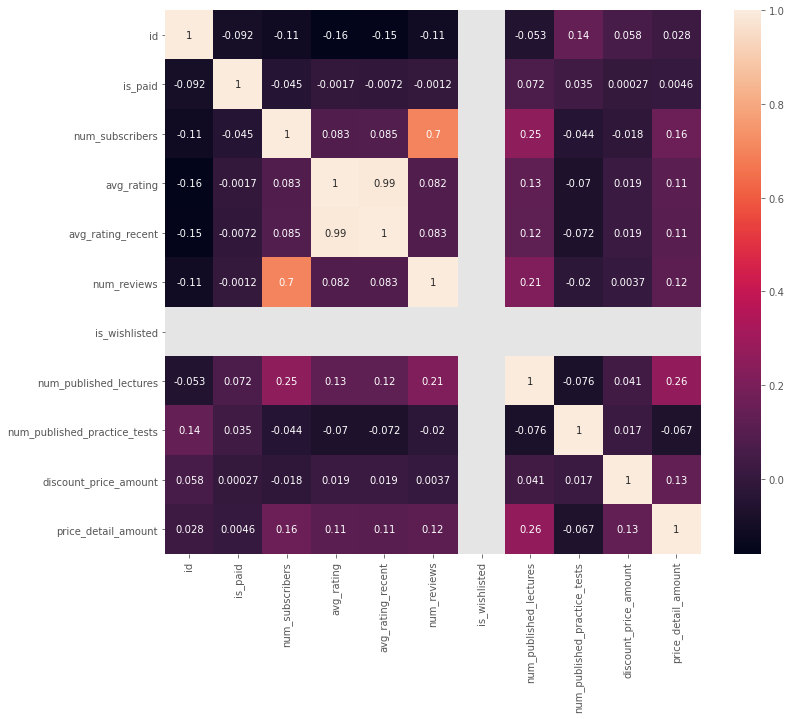

In [22]:
def plot_corr_mat(dataframe):
    corr_mat = dataframe.corr()

    fig, ax = plt.subplots(figsize=(12,10))
    ax = sb.heatmap(
        corr_mat,
        cbar=True,
        annot=True,
    )

plot_corr_mat(sample)

What is up with `is_wishlisted`?

In [23]:
sample.is_wishlisted.value_counts()

False    4763
Name: is_wishlisted, dtype: int64

Alright, now I get it. Since there only is one value, its growth can't be correlated to the other features.  
Let's just ignore it then.

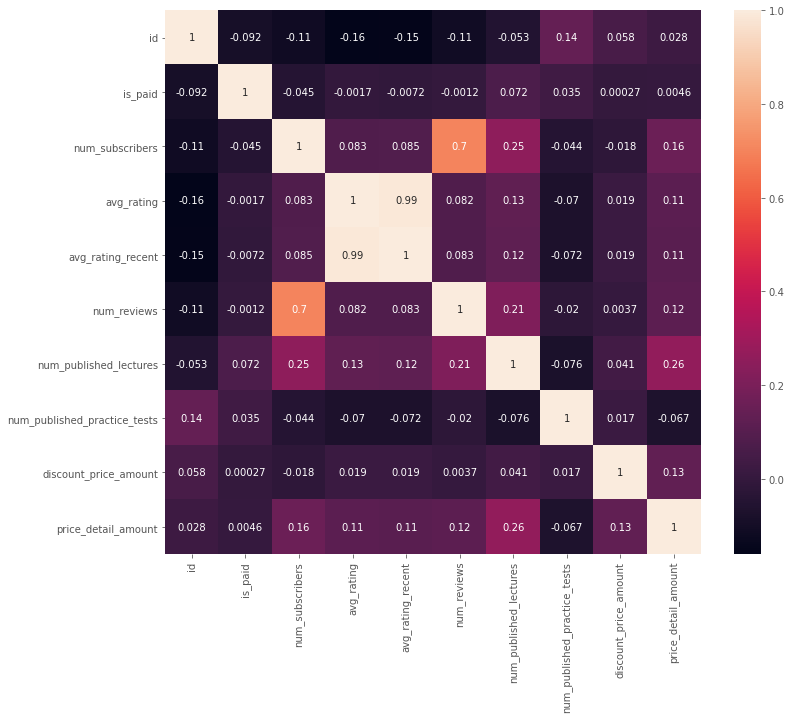

In [24]:
plot_corr_mat(sample.drop('is_wishlisted', axis=1))

There are exactely two big positive correlations:
* `avg_rating_recent` vs `avg_rating`: these two columns express the same thing, no wonder they are so close to being perfectly correlated
* `num_reviews` vs `num_subscribers`: this one is also pretty straight-forward. The more subscribers a course has, the more reviews it will likely get.  

Since `avg_rating_recent` vs `avg_rating` basically have the same meaning, I'll `drop(avg_rating_recent)`

In [25]:
df.drop('avg_rating_recent', axis=1, inplace=True)
sample.drop('avg_rating_recent', axis=1, inplace=True)

A question rises:  
> can we assume that the higher the number of reviews, the higher the rating?

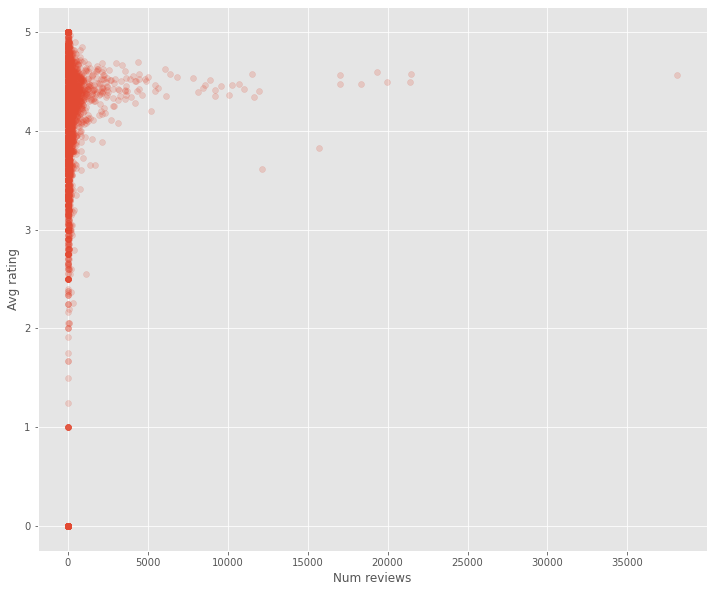

In [26]:
def plot_review_vs_rating(dataframe):
    fig, ax = plt.subplots(figsize=(12,10))

    x = dataframe['num_reviews']
    y = dataframe['avg_rating']

    ax.scatter(x, y, alpha=0.2)

    ax.set_xlabel('Num reviews')
    ax.set_ylabel('Avg rating')

plot_review_vs_rating(sample)

I expected to see many more occurences in range `num_reviews > 5000 U avg_rating in [4, 5]`, meaning that for more than 5000 reviews, the average rating tends to be higher.  
My guess (based on my personal experience and interpretation) was that if a user leaves a review, typically has the time and will to do so because he's satisfied, so there's a high chance that review is going to be positive.  
Instead, we can see that the average rating is mostly uniform with less than 5000 reviews.  
Let's check if the same applies for the entire `df`.

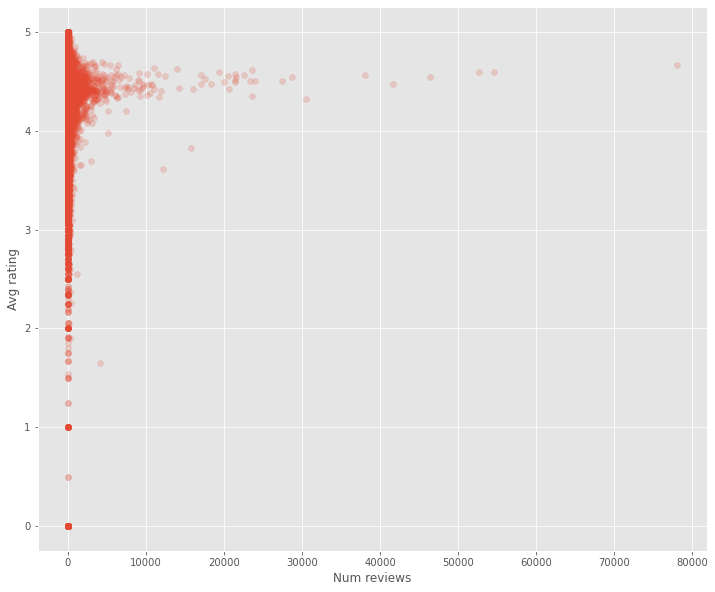

In [27]:
plot_review_vs_rating(df)

Pretty much the same.  
Let's now see the `discount_price_amount` vs `price_detail_amount`.  

I'll remember that:
- `price_detail_amount` is the price of the course **before** applying the discount
- `discount_price_amount` is the price of the course **after** the discount has been applied

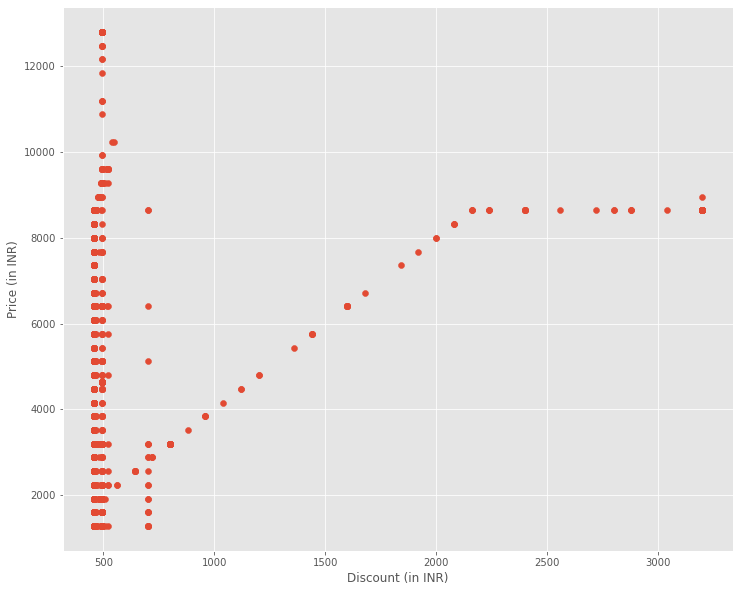

In [28]:
def plot_discount_vs_price(dataframe):
    fig, ax = plt.subplots(figsize=(12,10))

    x = dataframe['discount_price_amount']
    y = dataframe['price_detail_amount']

    ax.scatter(x, y)

    ax.set_xlabel('Discount (in INR)')
    ax.set_ylabel('Price (in INR)')

plot_discount_vs_price(sample)

We see an interesting pattern in this plot.  
For discount prices in range 0~750 INR we see that the actual price of the course is much higher.  
That is, a very high discount is applied to most courses so that their final price ends up in range 0~750.  

> Why is that so?  

This is a typical procedure for Udemy: they tend to offer high discounts for expensive courses, generally having the final price to be roughly 10$ (or, in this case, around 750 Indian Rupees).  

Let's improve our plot to better visualize this information.

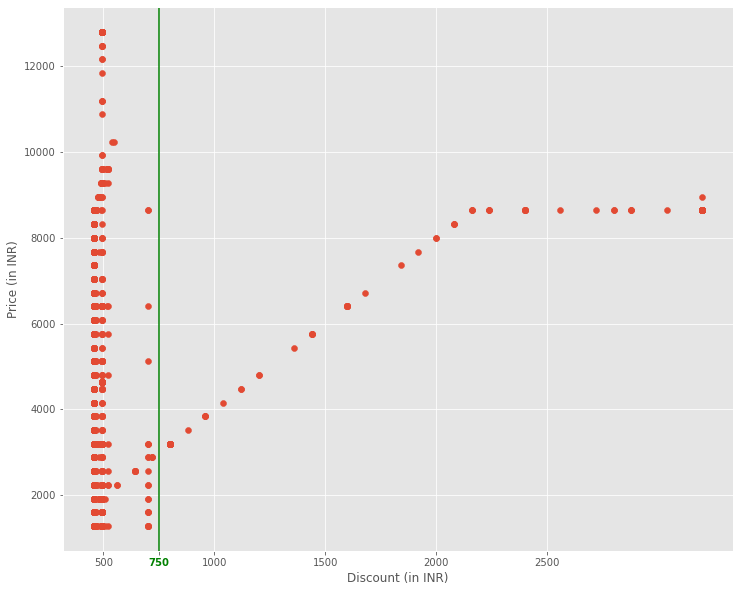

In [29]:
def plot_discount_vs_price(dataframe):
    fig, ax = plt.subplots(figsize=(12,10))

    x = dataframe['discount_price_amount']
    y = dataframe['price_detail_amount']

    ax.scatter(x, y)

    ax.set_xlabel('Discount (in INR)')
    ax.set_ylabel('Price (in INR)')

    xticks = list(np.arange(500, 3000, 500))
    xticks.insert(1, 750)
    ax.set_xticks(xticks)

    # change color of tick representing 750 INR
    color = 'green'

    tick_750 = fig.gca().get_xticklabels()[1]  # type matplotlib.Text
    tick_750.set_color(color)
    tick_750.set_fontweight('bold')

    # add a green vertical line
    line = ax.axvline(750)
    line.set_color(color)

plot_discount_vs_price(sample)

To me, that looks *neat*!  
I'm sure there are better ways to enfatize such concept, but I think this is a good compromise between easy-to-code and easy-to-understand.

# Feature scaling

Our dataset contains numeric features with very different scales: for example, `avg_rating` goes from 0 to 5 while `num_reviews` can grow indefinetly.  
We have to apply a linear function to scale all the values to a much smaller range, so that during training our models have a better time figuring out patterns in data.  
Let's extract the numeric features only.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   url                           13608 non-null  object             
 3   is_paid                       13608 non-null  bool               
 4   num_subscribers               13608 non-null  int64              
 5   avg_rating                    13608 non-null  float64            
 6   num_reviews                   13608 non-null  int64              
 7   is_wishlisted                 13608 non-null  bool               
 8   num_published_lectures        13608 non-null  int64              
 9   num_published_practice_tests  13608 non-null  int64              
 10  created                       1360

*IMPORTANT!*  
Since our target will be `avg_rating`, we **don't** want to scale it, otherwise it will lose meaning.

In [31]:
numeric_dtypes = ['int64', 'float64']

numfeats = df.select_dtypes(include=numeric_dtypes)
numfeats.drop(['id', 'avg_rating'], inplace=True, axis=1)  # id column is not necessary
numfeats.head()

num_subscribers  num_reviews  num_published_lectures  \
0           295509        78006                      84   
1           209070        54581                      78   
2           155282        52653                     292   
3           245860        46447                     338   
4           374836        41630                      83   

   num_published_practice_tests  discount_price_amount  price_detail_amount  
0                             0                  455.0               8640.0  
1                             0                  455.0               8640.0  
2                             2                  455.0               8640.0  
3                             0                  455.0               8640.0  
4                             0                  455.0               8640.0

We now must choose whether to apply a **normalization** or a **standardization**.  
What differs is that:
- normalization makes so that *all* the values range from 0 to 1. This kind of transformation is very simple and straight-forward
- standardization does not bind values to a specific range, instead 
    * subtracts the mean value
    * divides by the standard deviation

Standardization performs better with outliers, but do we have any?  
To check if we do, let's use the `describe()` method on the dataframe. That prints some useful stats.

In [32]:
numfeats.describe()

num_subscribers   num_reviews  num_published_lectures  \
count     13608.000000  13608.000000            13608.000000   
mean       2847.010435    243.169827               32.224794   
std        9437.865634   1580.965895               42.766911   
min           0.000000      0.000000                0.000000   
25%          62.000000      7.000000               12.000000   
50%         533.000000     24.000000               21.000000   
75%        2279.500000     87.000000               37.000000   
max      374836.000000  78006.000000              699.000000   

       num_published_practice_tests  discount_price_amount  \
count                  13608.000000           13608.000000   
mean                       0.110523             493.943794   
std                        0.623501             253.644054   
min                        0.000000             455.000000   
25%                        0.000000             455.000000   
50%                        0.000000             455.000000   
75%                        0.000000             455.000000   
max                        6.000000            3200.000000   

       price_detail_amount  
count         13608.000000  
mean           4646.992602  
std            3051.792396  
min            1280.000000  
25%            1600.000000  
50%            3840.000000  
75%            8640.000000  
max           12800.000000

Some columns like `num_subscribers`, `num_published_lectures` and `num_reviews` seem to have outliers. This is because the range of their values is very high, aswell as the standard deviation.  

On these three, let's visualize a `boxplot`. That will visually confirm the presence of many outliers.

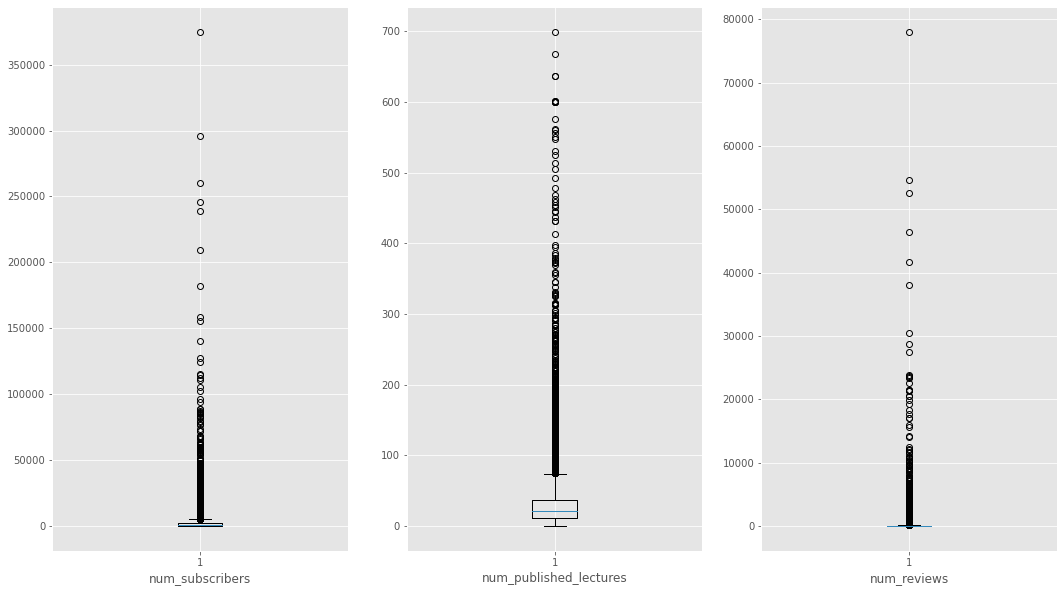

In [33]:
def visualize_outliers(dataframe):
    fig, ax = plt.subplots(ncols=3, figsize=(18,10))

    for i, col in enumerate(['num_subscribers', 'num_published_lectures', 'num_reviews']):
        ax[i].boxplot(dataframe[col])
        
        ax[i].set_xlabel(col)

visualize_outliers(numfeats)

As expected, there are many outliers. We can assume that the same applies for all the other features.  
Let's use SkLearn's `StandardScaler` to apply the standardization.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transf_numfeats = scaler.fit_transform(numfeats)
transf_numfeats.shape

(13608, 6)

Now, just as we did when imputing, we have to merge these changes to the original `df`.

In [35]:
transf_numfeats_df = pd.DataFrame(transf_numfeats, columns=numfeats.columns, dtype=float)
transf_numfeats_df.head()

num_subscribers  num_reviews  num_published_lectures  \
0        31.010480    49.188719                1.210681   
1        21.851399    34.371283                1.070381   
2        16.152020    33.151731                6.074433   
3        25.749669    29.226138                7.150071   
4        39.415973    26.179155                1.187298   

   num_published_practice_tests  discount_price_amount  price_detail_amount  
0                     -0.177269              -0.153543             1.308462  
1                     -0.177269              -0.153543             1.308462  
2                      3.030541              -0.153543             1.308462  
3                     -0.177269              -0.153543             1.308462  
4                     -0.177269              -0.153543             1.308462

In [36]:
# drop df columns with missing values
df.drop(numfeats.columns, axis=1, inplace=True)
# join with the newly created df
df = df.join(transf_numfeats_df)

In [37]:
df.head()

id                                              title  \
0   762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1   937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2  1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3   648826         The Complete Financial Analyst Course 2020   
4   637930  An Entire MBA in 1 Course:Award Winning Busine...   

                                                 url  is_paid  avg_rating  \
0                 /course/the-complete-sql-bootcamp/     True     4.66019   
1                                 /course/tableau10/     True     4.58956   
2                        /course/pmp-pmbok6-35-pdus/     True     4.59491   
3     /course/the-complete-financial-analyst-course/     True     4.54407   
4  /course/an-entire-mba-in-1-courseaward-winning...     True     4.47080   

   is_wishlisted                   created            published_time  \
0          False 2016-02-14 22:57:48+00:00 2016-04-06 05:16:11+00:00   
1          False 2016-08-22 12:10:18+00:00 2016-08-23 16:59:49+00:00   
2          False 2017-09-26 16:32:48+00:00 2017-11-14 23:58:14+00:00   
3          False 2015-10-23 13:34:35+00:00 2016-01-21 01:38:48+00:00   
4          False 2015-10-12 06:39:46+00:00 2016-01-11 21:39:33+00:00   

  discount_price_currency price_detail_currency  num_subscribers  num_reviews  \
0                     INR                   INR        31.010480    49.188719   
1                     INR                   INR        21.851399    34.371283   
2                     INR                   INR        16.152020    33.151731   
3                     INR                   INR        25.749669    29.226138   
4                     INR                   INR        39.415973    26.179155   

   num_published_lectures  num_published_practice_tests  \
0                1.210681                     -0.177269   
1                1.070381                     -0.177269   
2                6.074433                      3.030541   
3                7.150071                     -0.177269   
4                1.187298                     -0.177269   

   discount_price_amount  price_detail_amount  
0              -0.153543             1.308462  
1              -0.153543             1.308462  
2              -0.153543             1.308462  
3              -0.153543             1.308462  
4              -0.153543             1.308462

# Modeling

Let's start off with creating `X` and `y`.  
`avg_rating` should be our target, but which features do we really care about?

In [38]:
df.columns

Index(['id', 'title', 'url', 'is_paid', 'avg_rating', 'is_wishlisted',
       'created', 'published_time', 'discount_price_currency',
       'price_detail_currency', 'num_subscribers', 'num_reviews',
       'num_published_lectures', 'num_published_practice_tests',
       'discount_price_amount', 'price_detail_amount'],
      dtype='object')

Sure enough, we won't be needing:
- `id`
- `title`
- `url`
- `created`
- `published_time`
- `discount_price_currency`
- `price_detail_currency`

We'll see later about the other features.

In [72]:
todrop = ['avg_rating', 'id', 'title', 'url', 'created', 'published_time',
        'discount_price_currency', 'price_detail_currency', 'is_wishlisted']
X = df.drop(todrop, axis=1)
y = df['avg_rating']

In [40]:
X.head()

is_paid  is_wishlisted  num_subscribers  num_reviews  \
0     True          False        31.010480    49.188719   
1     True          False        21.851399    34.371283   
2     True          False        16.152020    33.151731   
3     True          False        25.749669    29.226138   
4     True          False        39.415973    26.179155   

   num_published_lectures  num_published_practice_tests  \
0                1.210681                     -0.177269   
1                1.070381                     -0.177269   
2                6.074433                      3.030541   
3                7.150071                     -0.177269   
4                1.187298                     -0.177269   

   discount_price_amount  price_detail_amount  
0              -0.153543             1.308462  
1              -0.153543             1.308462  
2              -0.153543             1.308462  
3              -0.153543             1.308462  
4              -0.153543             1.308462

Now let's pick a model.  
Sklearn cheatsheet always comes handy.  


![](./img/sklearn-estimators.png)

`ElasticNet` should be our first try, then `SGD` and eventually the trusty `RandomForestRegressor`.

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [44]:
from sklearn.linear_model import ElasticNet

elnet = ElasticNet(random_state=seed)
elnet.fit(X_train, y_train);

In [45]:
# overfit check
trainscore = elnet.score(X_train, y_train)
testscore = elnet.score(X_test, y_test)

print(f"Train score: {trainscore}\nTest score: {testscore}")

Train score: 0.0
Test score: -0.002687722522605185


Mh... Not good. In fact, when `r2_score` $\leq0$ it means that our model is behaving *worse* than the baseline model, which always predicts the mean of the target variable.  
Let's cross-validate our results.



In [46]:
-cross_val_score(elnet, X_test, y_test, scoring="neg_mean_squared_error")

array([0.84441558, 0.74446217, 0.85054441, 0.9244758 , 1.21361337])

As we can see, even the `MSE` is not looking good. On average, we lose 1 point in the prediction: that is, instead of predicting a rating of 5/5, we predict 4/5. There's a lot to be done here.  

Now instead of using the `scoring` parameter, I will confront the predictions made on `X_test` with the ground truth, i.e. `y_test`. If the difference differs for more than some value `threshold`, I will consider the prediction as wrong, otherwise as correct.

In [47]:
def evaluate_preds(y_true, y_preds, thresh=0.25):
    if len(y_true) != len(y_preds):
        print("Predictions and target differ in length!")
        return
    
    results = []
    for i in range(len(y_preds)):
        if np.round(y_true[i], 2) - np.round(y_preds[i], 2) <= thresh:
            results.append(True)
        else:
            results.append(False)
    
    return np.array(results).sum() / len(results)


preds = elnet.predict(X_test)
evaluate_preds(y_test.to_numpy(), preds)

0.4761204996326231

Using this evaluation method, we only get 50% of the predictions correct.  
Let's see if we can improve it by applying a `RandomizedSearchCV`.

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

parametersGrid = {
    "max_iter": [1, 5, 10],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": np.arange(0.0, 1.0, 0.1)
}

rscv = RandomizedSearchCV(
    elnet,
    parametersGrid,
    n_iter=25,
    cv=5,
    random_state=seed
)
rscv.fit(X_train, y_train);

In [49]:
# evaluate the best ElasticNet estimator
elnet_best = rscv.best_estimator_
preds = elnet_best.predict(X_test)
evaluate_preds(y_test.to_numpy(), preds)

0.5044085231447465

Improved, but only slightly.  
Instead of wasting time trying to over-tune it, let's see another model.  

Next on the line: `SGD`.

In [50]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=seed)
sgd.fit(X_train, y_train);

In [51]:
sgd.score(X_train, y_train), sgd.score(X_test, y_test)

(0.02556339128923557, 0.01871153001408732)

In [52]:
# r2 score
cross_val_score(sgd, X_test, y_test)

array([ 0.00996116, -0.00663856, -0.00354633,  0.00087487, -0.00292104])

In [53]:
# mse score
-cross_val_score(sgd, X_test, y_test, scoring="neg_mean_squared_error")

array([0.83548152, 0.7425559 , 0.85355327, 0.92356418, 1.2030813 ])

`SGD` is overfitting the training data. I was expecting this, as `SGD` is a more complex model than `ElasticNet`, thus more prone to overfitting.  


Let's skip to `RandomForestRegressor`, another complex model, just to confirm my hypothesis.

In [54]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=seed)
rfr.fit(X_train, y_train);

In [55]:
# on test data
cross_val_score(rfr, X_test, y_test), -cross_val_score(rfr, X_test, y_test, scoring="neg_mean_squared_error")

(array([0.65279018, 0.66357361, 0.69267612, 0.68499126, 0.80119305]),
 array([0.29300607, 0.24816792, 0.26139033, 0.29118554, 0.2384843 ]))

In [56]:
# on train data
cross_val_score(rfr, X_train, y_train), -cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error")

(array([0.76496849, 0.7714793 , 0.75665324, 0.78442524, 0.76561387]),
 array([0.25591732, 0.25040445, 0.26601266, 0.24783739, 0.25189693]))

Well, this is to be expected.  
At this point, the most frightening question rises, as always should when we see that more than one model overfits the training data:
> do we have good quality data?  

Honestly, I'm not entirely sure: by looking at the features, I can't see a potential pattern that may lead to the correct answer.  
However, I see a possible workaround.

# Changing evaluation method

Up until now, I have considered this to be a **regression** problem.  
Why? Well, simply because we are trying to predict a numeric value, that is the rating of a course.  

Now think of this problem: say we're trying to predict the number of doors a car has. No matter the features we have available, the possible target values should be something like `[2, 3, 4, 5]`.  
We can say that every car will fall in one of this *categories*.  

Same for this problem: we can simplify our rating, which by now is continuous in range `[0, 5]`, by rounding the decimal part of each value to either `.0` or `.5`.  

With that, all the possible values we'll end up having in our target will be:  

`[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]`  

Let's create a rounding function to do that.

In [57]:
import math

def rounding(n):
    dec, whole = math.modf(n)
    whole = int(whole)
    rounded_dec = np.round(dec, 1)

    if 0 <= rounded_dec < 0.3:
        return float(f"{whole}.0")
    elif 0.3 <= rounded_dec < 0.6:
        return float(f"{whole}.5")
    else:
        return float(f"{whole+1}.0")

Now, let's apply this function to our target `y`.

In [58]:
f = np.vectorize(rounding)  # define a vectorize function
rounded = f(y.to_numpy())  # apply it on the whole target variable

y = pd.Series(rounded)
y.value_counts()

4.0    5588
4.5    3645
5.0    2143
3.5     819
0.0     684
3.0     570
2.5      67
2.0      54
1.0      31
1.5       5
0.5       2
dtype: int64

Wonderful!  

One last thing to do is to convert these values to categories.  
There are numerous ways to do so, for simplicity I will use Pandas-generated category codes.

In [59]:
y_cat = y.astype('category').cat.codes

# create a dictionary that will hold the 
# category value as key and the actual rating as value
categories = {}
for rating, catcode in zip(np.unique(y.to_numpy()), np.unique(y_cat.to_numpy())):
    categories[catcode] = rating

categories

{0: 0.0,
 1: 0.5,
 2: 1.0,
 3: 1.5,
 4: 2.0,
 5: 2.5,
 6: 3.0,
 7: 3.5,
 8: 4.0,
 9: 4.5,
 10: 5.0}

Let's see if this change helps our models.  
Now we'll need *classifiers*. I'll pick:  
- `LinearSVC`
- `KNeighboursClassifier`
- `RandomForestClassifier`

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=seed)

In [86]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=seed)
svc.fit(X_train, y_train);

In [87]:
svc.score(X_test, y_test)

0.44783247612049965

Not too good, but we can improve this score, again via `RandomizedSearchCV`.  
But first... Is the model overfitting again?

In [88]:
svc.score(X_train, y_train)

0.44194378100312326

Nope!  
At least that's good news. On with the improving.

In [64]:
svc_gridsearch = False

Exception: 

In [ ]:
 if svc_gridsearch:  # WILL TAKE TIME
    parametersGrid = {
        'C': np.arange(1, 101, 10),
        # 'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['poly', 'rbf'],
        'degree': np.arange(2, 10, 1)
    }

    rscv = GridSearchCV(
        svc,
        parametersGrid,
        n_jobs=-1
    )
    rscv.fit(X_train, y_train)
    rscv.score(X_test, y_test)

In [65]:
from sklearn.neighbors import KNeighborsClassifier as KNC

knn = KNC()
knn.fit(X_train, y_train);

In [66]:
knn.score(X_test, y_test)

0.3986039676708303

In [67]:
parametersGrid = {
    'n_neighbors': np.arange(5, 50, 5),
    'leaf_size': np.arange(10, 50, 5),
    'p': [1, 2]
}

rscv = GridSearchCV(
    knn,
    parametersGrid,
)
rscv.fit(X_train, y_train);

In [68]:
rscv.score(X_test, y_test)

0.446730345334313

# Dimensionality reduction

So far, we have observed that most of the complex models (`SGD`, `RandomForest` ecc.) tend to overfit, both considering regression and classification.  
Therefore, the question of "Do we have good data" is now to be taken into consideration.  

One thing that's relatively easy to do is to let Scikit-Learn pick the best scoring features for us, using methods from the `sklearn.feature_selection` module.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=seed)

In [80]:
X_train.columns

Index(['is_paid', 'num_subscribers', 'num_reviews', 'num_published_lectures',
       'num_published_practice_tests', 'discount_price_amount',
       'price_detail_amount'],
      dtype='object')

In [84]:
X_train.head()

is_paid  num_subscribers  num_reviews  num_published_lectures  \
9678     True        -0.152690    -0.094357                1.748500   
318      True         3.073264     0.839916                0.579329   
9998     True        -0.080637    -0.139268                0.135044   
5126     True        -0.255259    -0.136738               -0.215707   
1651     True        -0.173140    -0.028572               -0.215707   

      num_published_practice_tests  discount_price_amount  price_detail_amount  
9678                     -0.177269              -0.153543             1.308462  
318                      -0.177269              -0.153543             1.308462  
9998                     -0.177269              -0.153543             1.308462  
5126                     -0.177269               0.000000            -0.893604  
1651                     -0.177269              -0.153543            -0.474163

I will now use `SelectKBest`, where `k` is an arbitrary number of features. We now have seven, let's choose 4 and see how it performs.  

**NOTE**: after selection, we will lose the column name. To get it back, I'll use this function.  

In [95]:
def restore_columns(from_: pd.DataFrame, selector):
    """
    Returns the column names from the `from_` DataFrame after a feature selection took place by `selector`.
    """
    cols = [from_.columns[i] for i in range(len(from_.columns)) if selector.get_support()[i]]
    return cols

In [124]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=3)

In [125]:
# train
selected = selector.fit_transform(X_train, y_train)
X_train_selected = pd.DataFrame(selected, columns=restore_columns(X_train, selector))

In [126]:
# test
selected = selector.fit_transform(X_test, y_test)
X_test_selected = pd.DataFrame(selected, columns=restore_columns(X_test, selector))

Now that we have reduced the number of features, let's re-fit `SVC` and `KNN` and see which performs best.

In [127]:
svc.fit(X_train_selected, y_train)
svc.score(X_train_selected, y_train), svc.score(X_test_selected, y_test)

(0.43937167003490724, 0.4456282145481264)

Well, still not too good.  

I think I've run out of resources. My attempt is now over!

# Conclusions

Sadly, I couldn't find a good method of structuring data and feeding it to a successful machine learning model.  
This *doesn't* mean that it's not possible, it only means that, with my current knowledge and skill in this field, I can't solve the problem.  

What I've learned so far is that:
- with the current dataset, it's very hard to find the correct features and thus, meaningful patterns in data
- there are some meaningful and interesting relations (as we saw during EDA), but not enough to "draw a distinct line between data" (maybe I'm missing some more meaningful relations)
- with such data, complex models tend to overfit